In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Title'] = train['Name']
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry"


In [5]:
import re
title = re.compile('\w+\.')

for i, row in train.iterrows():
    t = title.findall(row['Title'])
    train.at[i,'Title'] = t[0]

In [6]:
# Only Mr, Mrs, Miss and Master are in significant numbers - clump everyone else into a 5th category
for i, row in train.iterrows():
    if not(row['Title'] == 'Mr.' or row['Title'] == 'Mrs.' or row['Title'] == 'Miss.' or row['Title'] == 'Master.'):
        train.at[i, 'Title'] = 'Other'
    

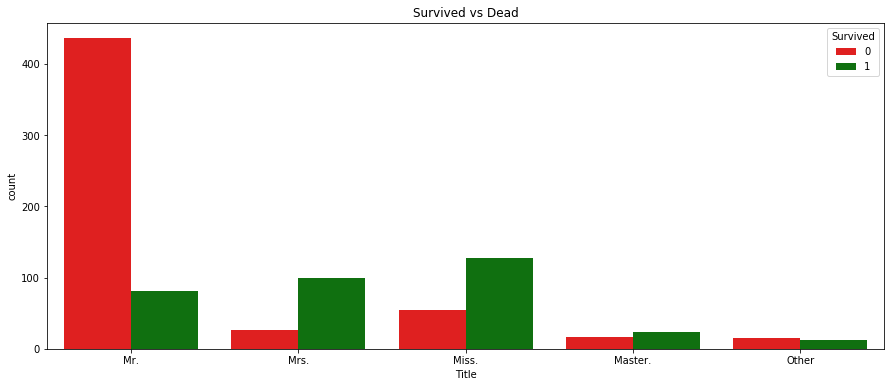

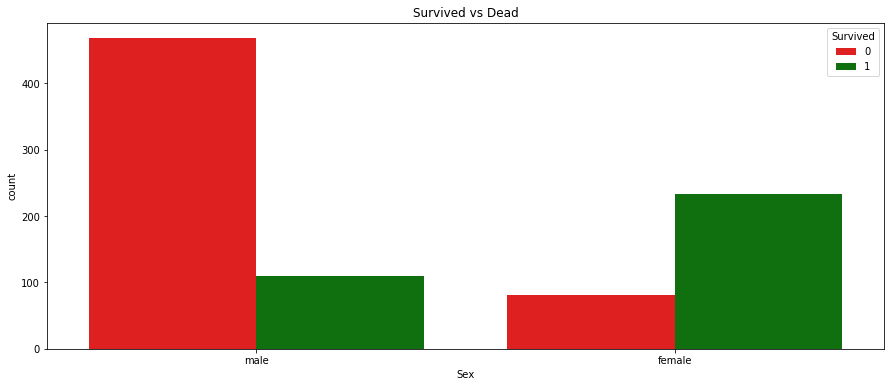

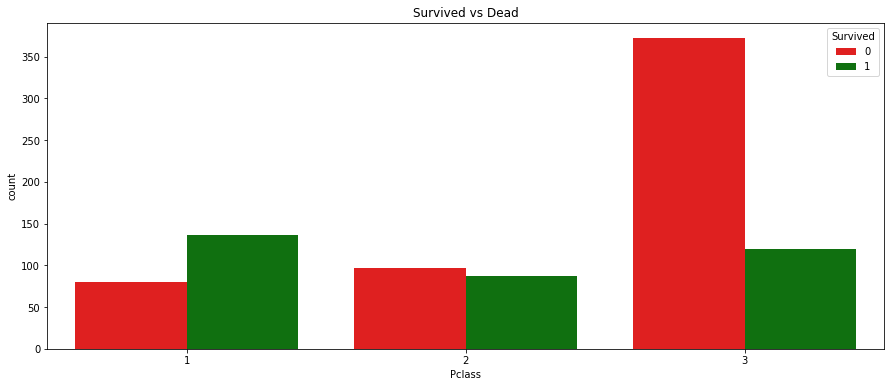

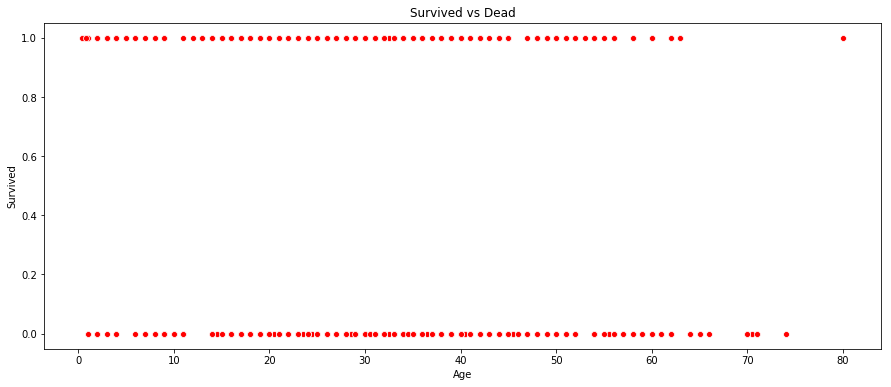

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
def plot(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #ax1 = plt.subplot(1, 2, 1)
    sns.set_palette(sns.color_palette(['r', 'g']))
    sns.countplot(hue='Survived', x=feature, data=train)
    #sns.countplot(train[feature][train.Survived == 1],ax=ax, color='g')
    #sns.countplot(train[feature][train.Survived == 0],ax=ax, color='r')
    plt.title('Survived vs Dead')
    #ax2 = plt.subplot(1, 2, 2)
    #sns.countplot(train[feature][train.Survived == 0],ax=ax2)
    #plt.title('Dead')
    
    #alive = train[train['Survived'] == 1][feature].value_counts()
    #dead = train[train['Survived'] == 0][feature].value_counts()
    #df = pd.DataFrame([alive, dead])
    #df.index = ['Survived', 'Dead']
    #df.plot(kind='bar', stacked=True, figsize=(10,5))
    
def plot_scatter(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #sns.set_palette(sns.color_palette(['r', 'g']))
    sns.scatterplot(x=feature, y='Survived', data=train, palette=['r','g'])
    plt.title('Survived vs Dead')
    
plot('Title')
plot('Sex')
plot('Pclass')
plot_scatter('Age')

In [5]:
# Not considering Age as it has null values
X_train = train[['Pclass', 'Sex', 'SibSp', 'Parch']]
y_train = train['Survived']
X_test = test[['Pclass', 'Sex', 'SibSp', 'Parch']]

In [6]:
X_train.shape

(891, 4)

In [7]:
y_train.shape

(891,)

In [8]:
# convert categorical variable 'sex' to numeric
X_train['Sex_num'] = X_train['Sex'].apply(lambda x : 1 if x == "male" else 0)
X_test['Sex_num'] = X_test['Sex'].apply(lambda x : 1 if x == "male" else 0)


C:\Users\Himangshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Himangshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Sex_num
0,3,male,0,0,1
1,3,female,1,0,0
2,2,male,0,0,1
3,3,male,0,0,1
4,3,female,1,1,0


In [10]:
X_train.drop(columns=['Sex'], axis=1, inplace=True)
X_train.head()
X_test.drop(columns=['Sex'], axis=1, inplace=True)
X_test.head()


C:\Users\Himangshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Himangshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,SibSp,Parch,Sex_num
0,3,0,0,1
1,3,1,0,0
2,2,0,0,1
3,3,0,0,1
4,3,1,1,0


In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#X_train.isnull()
null_data = X_train[X_train.isnull().any(axis=1)]
null_data

,Pclass,SibSp,Parch,Sex_num


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
predictions = model.predict(X_test)

In [13]:
predictionsDF = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : predictions})

In [14]:
predictionsDF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [15]:
predictionsDF.to_csv("titanic_submission.csv", index=False)